### Iris model
    . The goal is to develop a model that accurately classify iris
    flowers into different species based on their sepal and petal
    measurements. This dataset is widely used for introductory
    classification tasks. the rating given to a movie by users or
    critics

In [158]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
data = pd.read_csv(r"C:\Users\Bamy\Downloads\spice\IRIS.csv")

data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [160]:
data.shape

(150, 5)

In [161]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [162]:
data.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [163]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

C:\Users\Bamy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


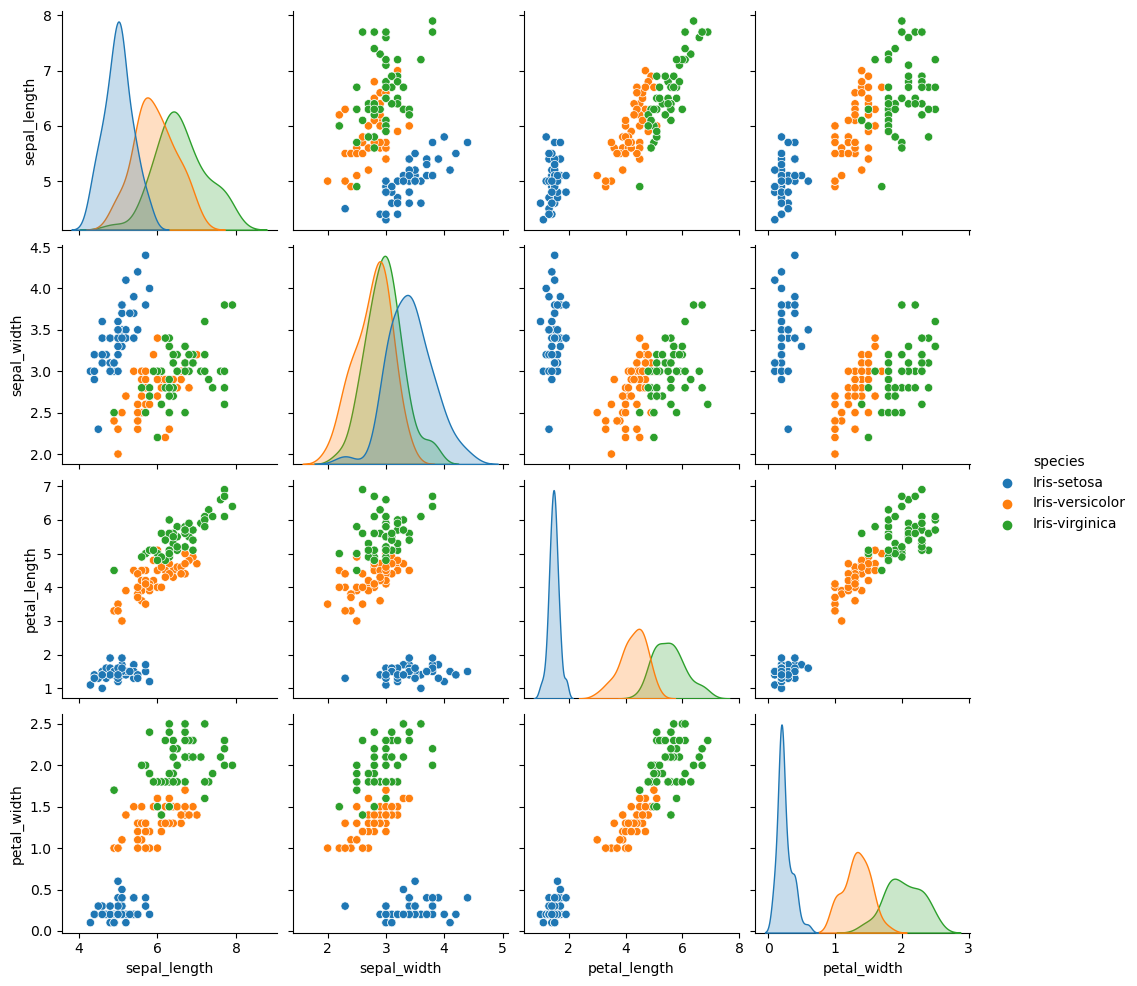

In [164]:
#Visualizing Data
sns.pairplot(data, hue='species')
plt.show()

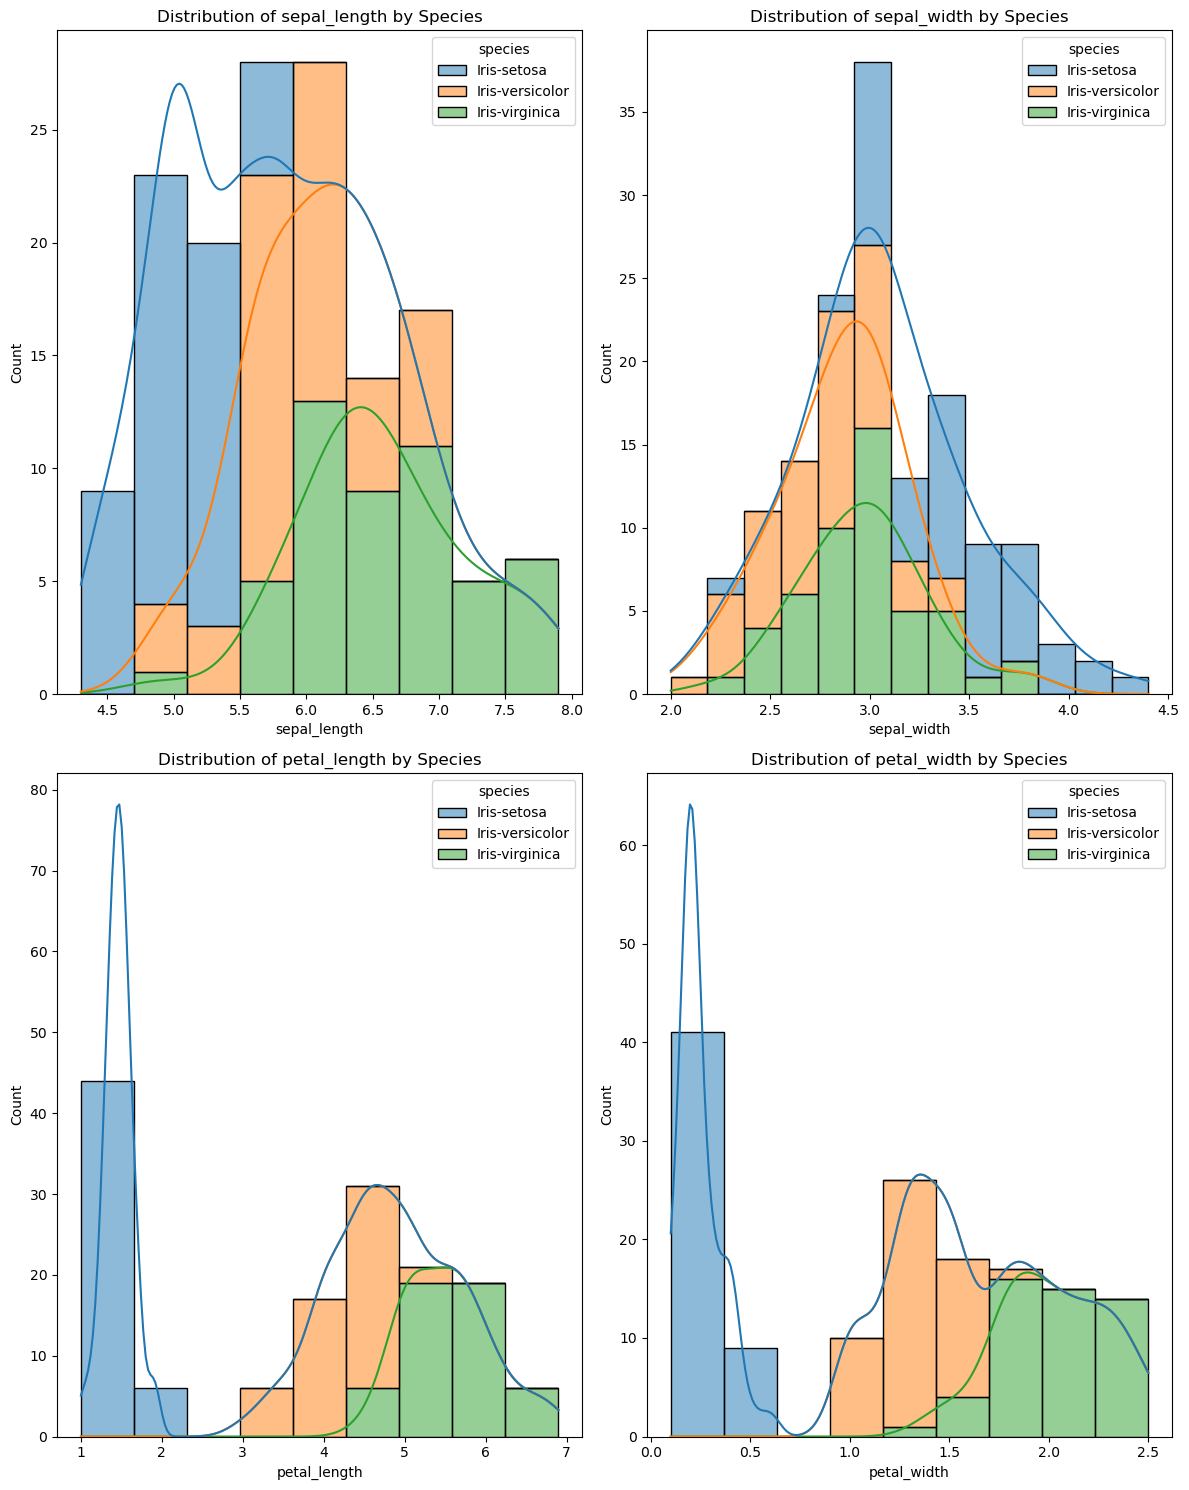

In [167]:
fig, axes = plt.subplots(2,2, figsize=(12,15))

axes = axes.flatten()

for i, column in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], start=0):
    sns.histplot(data=data, x=column, hue='species', multiple='stack', ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column} by Species')
    
plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Distribution of Species')

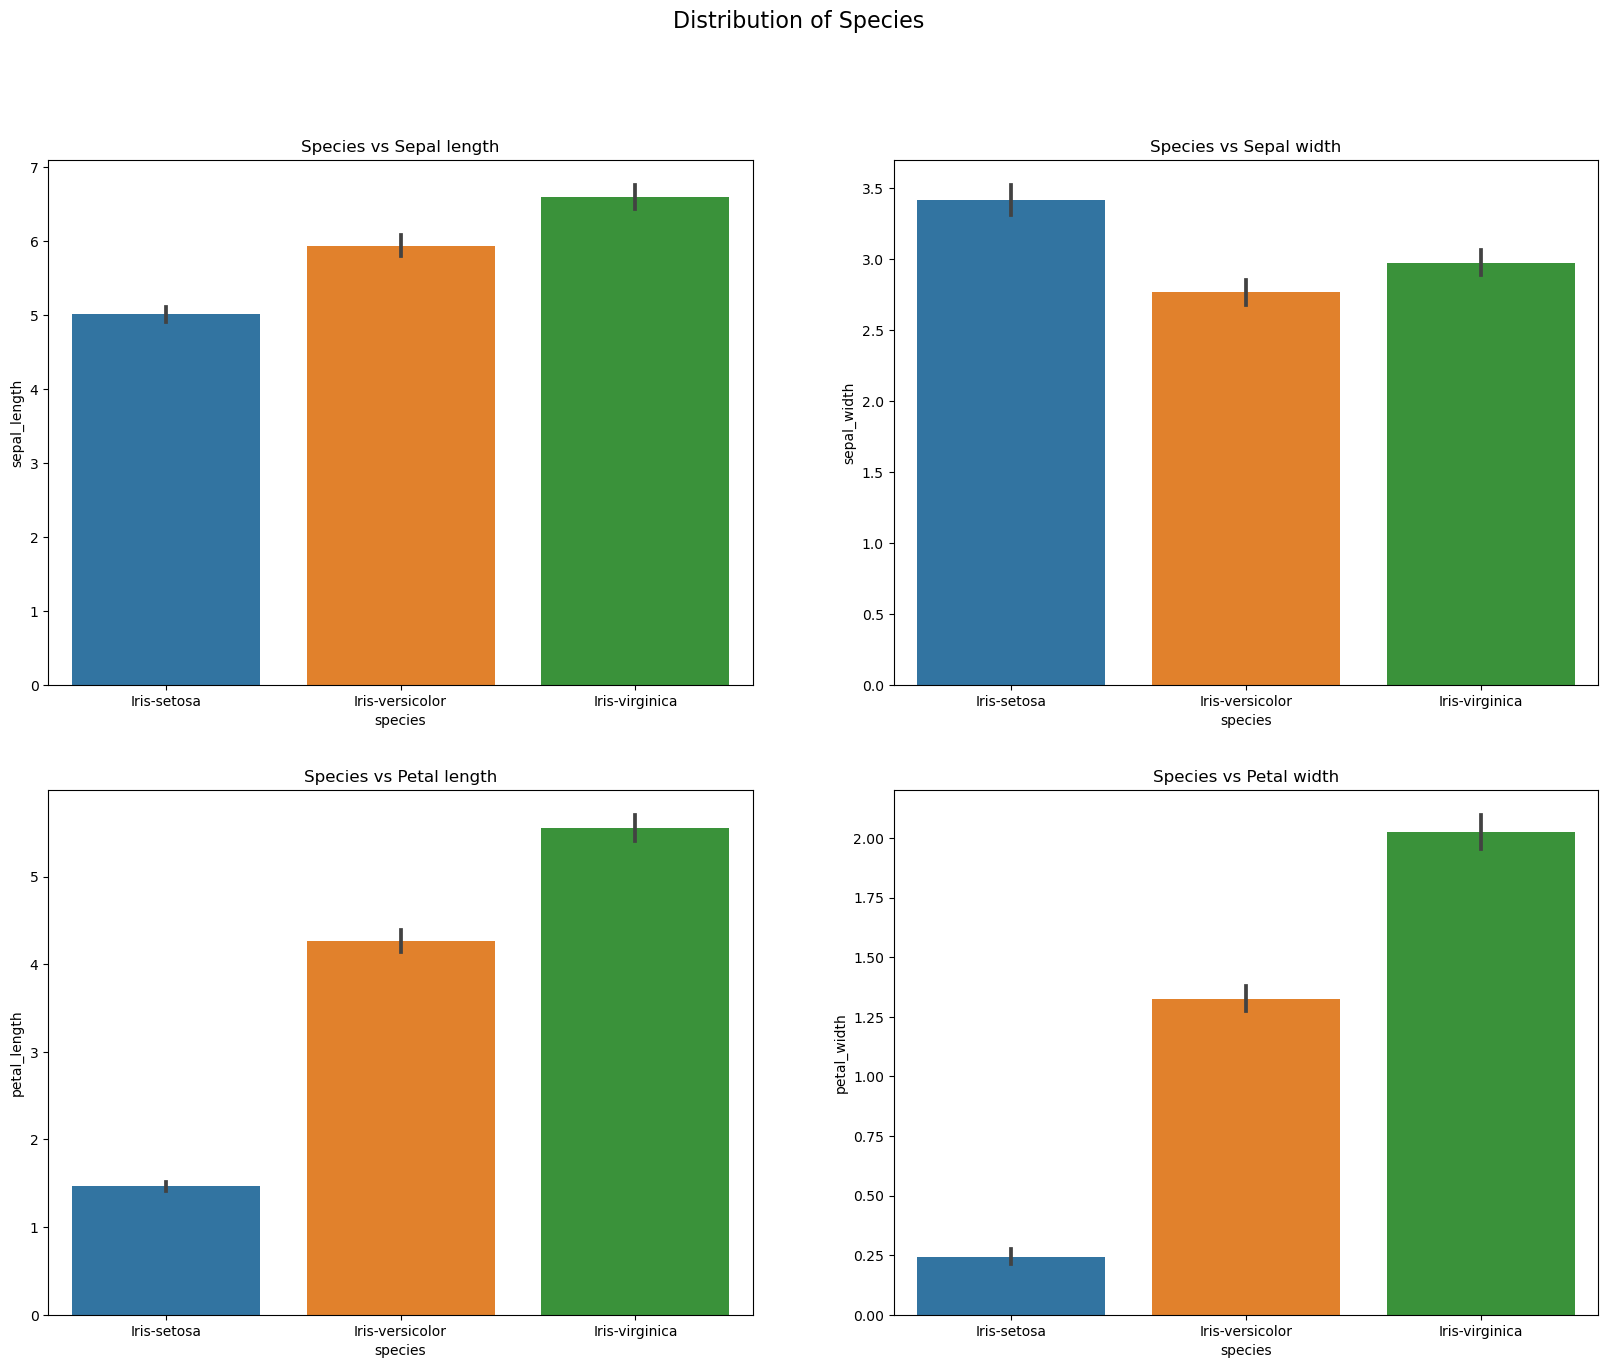

In [168]:
fig, axes = plt.subplots(2,2, figsize=(20, 15))

sns.barplot(x= data['species'], y=data['sepal_length'], ax=axes[0, 0])
axes[0, 0].set_title('Species vs Sepal length')


sns.barplot(x=data['species'], y=data['sepal_width'], data=data, ax=axes[0, 1])
axes[0, 1].set_title('Species vs Sepal width')


sns.barplot(x=data['species'], y=data['petal_length'], data=data, ax=axes[1, 0])
axes[1, 0].set_title('Species vs Petal length')


sns.barplot(x=data['species'], y=data['petal_width'], ax=axes[1, 1])
axes[1, 1].set_title('Species vs Petal width')

plt.suptitle('Distribution of Species', fontsize=16)

In [169]:
#Encoding categorical data
data.species = data.species.map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})

In [170]:
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [171]:
X = data.drop('species', axis=1)
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [173]:
y.isnull().sum()

0

In [174]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### Evaluating  the model and prediction

In [175]:
y_pred = knn_classifier.predict(X_test_scaled)

In [176]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


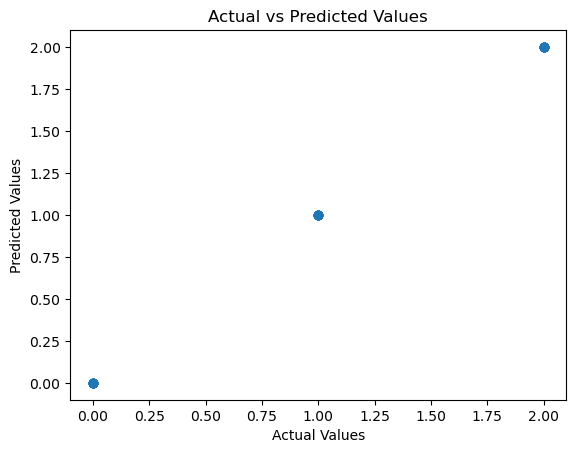

In [177]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()